# Assigment 7 Stats & Modeling

## The first step I am tkaing for this assignment is to first import the libraries i will be using for this assignment 

In [96]:
import requests
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from string import punctuation
import numpy as np
import pandas as pd

## Second step create python string from text

In [97]:
# Make a python string that contains the play Macbeth by William Shakespear.

# Text was found on project gutenberg

with open('macbeth.txt','w',encoding='utf-8') as f:
    f.write(requests.get('https://www.gutenberg.org/cache/epub/2264/pg2264.txt').text)

In [98]:
document = open ('macbeth.txt', 'r')
text = document.read().lower()

## Third Step, Tokenization & Lemmeatization

In [99]:
from nltk.tokenize import word_tokenize, sent_tokenize

## Fourth step
-now i am going to tokenize the text into sentences.

In [100]:
sentences = sent_tokenize(text)

## Fifth Step

-now i am going to tokenize the sentences into words.



In [101]:
words = []
for s in sentences:
    for w in word_tokenize(s):
        words.append(w)

In [102]:
# now lemmeatization of stemmed words

words_stemmed = [WordNetLemmatizer().lemmatize(w) for w in words]

## Sixth Step
### stop word removal

In [103]:
#ex_sw is short for extra stopwords

In [104]:
ex_sw = ['project', 'gutenberg', 'gutenberg-tm', '--', '...', '\\', 'ï', '»', '¿']

In [105]:
#sw is short for stopwords

sw = list(punctuation) + stopwords.words('english') + ex_sw

In [106]:
words_no_sw = [w for w in words_stemmed if w not in sw]

## Seventh step, Word Frequencies with mean median, mode & trimmed mean

In [107]:
#the words that are not a part of the stop word list are going to be significant words. *personal note*

words_no_sw = FreqDist(words_no_sw)

In [108]:
words_no_sw = [w for w in words_stemmed if w not in sw]

In [109]:
words_freq = FreqDist(words_no_sw)

In [110]:
wordlist = []
wordfreq = []
for i in sorted(words_freq, key=words_freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(words_freq[i])

In [111]:
df = pd.DataFrame({'wordlist': wordlist, 'wordfreq': wordfreq})

In [112]:
# now i can find the mean

df['wordfreq'].mean()

3.1443381180223287

In [113]:
# now i can find the mode

df['wordfreq'].mode()

0    1
dtype: int64

In [114]:
# now i can find the median

df['wordfreq'].median()

1.0

In [115]:
# Finding trimmed mean

df[df['wordfreq'] >= 5]['wordfreq'].mean()

14.652083333333334

Words that have a frequency that is lower than 5 occurances get omitted when calculatin the trimmed mean

I wanted to see the difference in the trimmed mean when comparing words that occur less than 5 times with words that occur less than 10 

In [116]:
# Finding trimmed mean

df[df['wordfreq'] >= 10]['wordfreq'].mean()

25.023474178403756

# Plotting the data 

### Next plot a histogram of the number of word frequency 


<AxesSubplot:title={'center':'Word Frenquency in Macbeth by Shakespeare'}, ylabel='Frequency'>

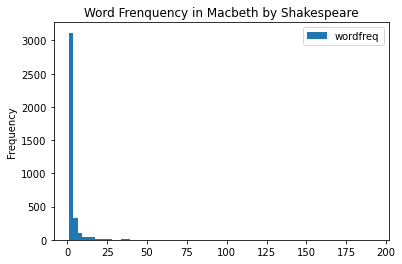

In [118]:
df.plot(kind='hist', bins=70, title='Word Frenquency in Macbeth by Shakespeare')

### Analysis for the above histogram:

The mean word frequency is roughly 3.29, which is on the very left corner of the histogram.

The scale of the x-axis is from 0 to over 200. The median and mode are both 1, which shows that the majority of the words appear once, and these values are plotted in the lower end of the x-axis of the histogram. 

The trimmed mean, which trimmed the word frequencies lower than 5, has a value of 14.52. This is still on the lower end of the histogram, However it skews more towards the right than the mean, mode, and median.

<AxesSubplot:title={'center':'Word Frequency in Macbeth  by Shakespeare'}, ylabel='Frequency'>

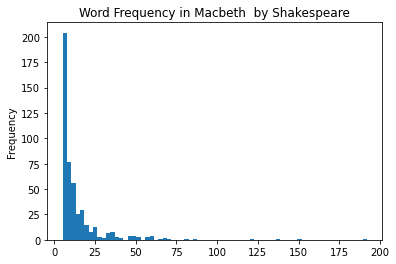

In [119]:
# word frequency histogram with word frequencies >= 5

df[df['wordfreq'] >= 5]['wordfreq'].plot(kind='hist', bins=70, title='Word Frequency in Macbeth  by Shakespeare')

This histogram only shows the word frequencies greater or equal to 5, and we are able to see the frequency distribution (especially the higher values) more clearly.

In [120]:
# standard deviation

df['wordfreq'].std()

7.8437720863697535

In [121]:
# interquartile range

df['wordfreq'].quantile(0.75) - df['wordfreq'].quantile(0.25)


1.0

### Overall Analysis

The standard deviation and the interquartile range can both be used to measure the spread of the values. For this analysis, the standard deviation and the interquartile range have a large difference because the data is skewed to the right. 

This indicates that there are a lot of outliers i.e. values of greater values than the normal value. The standard deviation is 8.27, this shows that there could be values that deviate far from the mean, 3.29. 

The interquartile range is only 2, with the 75% quantile being 2 and the 25% quantile being 1, demonstrates that there are is a very large number of values clustered at the lower end. 

On the histogram, the interquartile range would be at the very lower end, and the standard deviation would be to the right of it

# Foray into Machine learning

### First step is to import scikit-learn's example diabetes dataset as a Panda's dataframe

In [122]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

In [123]:
# To view description of the dataset

print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Exploratory Data Analysis

In [124]:
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [125]:
# get summary statistical information

features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [126]:
target_df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [127]:
# Summary statistical information of the targets

target_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [128]:
print(features_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [129]:
# find column in features_df that has the highest correlation coefficient with the target values in target_df

corrcoef_list = []

# loop through each column of features_df and generate 10 coefficients with target_df

for col in features_df.columns:
    corrcoef_list.append(np.corrcoef(features_df[col], target_df)[1][0])

In [130]:
# another form :
# for i in range(features_df.shape[1]):
#     corrcoef_list.append(np.corrcoef(features_df.iloc[:,i], target_df)[1][0])

In [131]:
corrcoef_list

[0.1878887507189198,
 0.0430619984516054,
 0.5864501344746891,
 0.4414838489308862,
 0.21202248101455076,
 0.17405358696874249,
 -0.39478925067091847,
 0.4304528847447734,
 0.5658834252428094,
 0.3824834842485812]

In [132]:
# find the maximum value of correlation coefficient

max_corrcoef = max(corrcoef_list)
print(max_corrcoef)

0.5864501344746891


In [133]:
# find the column index

index_max_corrcoef = corrcoef_list.index(max_corrcoef)
print(index_max_corrcoef)

2


In [134]:
# find the column name

colname_max_corrcoef = features_df.columns[index_max_corrcoef]
print(colname_max_corrcoef)

bmi


The column in features_df that has the highest correlation coefficient with the target values in target_df is the third column 

( Note: keep in mind 2nd in Python indexing), 

The result is bmi

# Scatter plot of the target values vs this feature column's values

<AxesSubplot:xlabel='bmi', ylabel='target'>

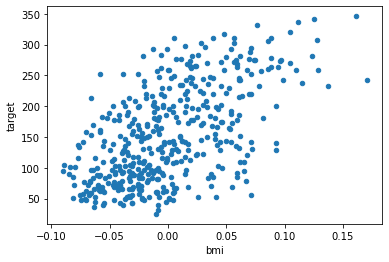

In [135]:
# Createa a scatter plot of the target values vs. the bmi column's values

bmi_target_df = pd.DataFrame({'bmi':features_df[colname_max_corrcoef], 'target':target_df})
bmi_target_df.plot(kind='scatter', x='bmi', y='target')

## Perform linear regression with Scikit-learn's LinearRegression

In [136]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
X = bmi_target_df[['bmi']]
y = bmi_target_df[['target']]

In [138]:
reg = LinearRegression().fit(X, y)

In [139]:
# this finds coefficient

reg.coef_

array([[949.43526038]])

In [140]:
# This find intercept

reg.intercept_

array([152.13348416])

In [141]:
ytrain = reg.intercept_ + reg.coef_ * X

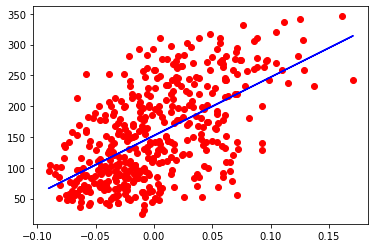

In [142]:
plt.plot(X, y, 'ro', X, ytrain, 'b-');

In [143]:
# calculate mean squared error


mean_squared_error(y, ytrain)

3890.4565854612724

In [144]:
# calculate R-squared value

r2_score(y, ytrain)

0.3439237602253803

## Linear regression with another variable, s5 (ltg, possibly log of serum triglycerides level)

In [145]:
# perform linear regression of the target values vs. the s3 column's values

X2 = features_df[['s5']]
y2 = target_df
reg2 = LinearRegression().fit(X2, y2)


In [146]:
# find coefficient of s5

reg2.coef_

array([916.13872282])

In [147]:
reg2.intercept_

152.13348416289628

In [148]:
ytrain2 = reg2.intercept_ + reg2.coef_ * X2

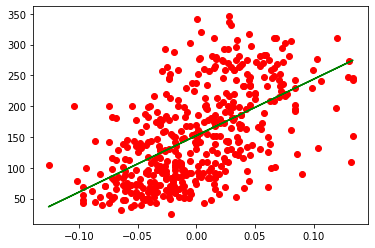

In [149]:
plt.plot(X2, y2, 'ro', X2, ytrain2, 'g-');

In [150]:
# calculate mean squared error

mean_squared_error(y2, ytrain2)

4030.9931334683297

In [151]:
# calculate R-squared value

r2_score(y2, ytrain2)

0.32022405096453443

The new fit mean sqaured error is higher and the R-squared value is lower